# Happiness: _A Reflection on a Worldly Subjective Subjective System_

Caleb Jensen, Undergrad \
Christian Allen, Undergrad \
Jessyca Allen, Undergrad 

---

## Table of Contents

1. [Introduction](#Introduction)
2. [Data](#Data)  
    2.1 [World Happiness Reports 2015-2022](#World-Happiness-Reports-2015-2022)
3. [Goal](#Goal)
4. [Imports](#Imports)
5. [Preprocessing](#Preprocessing) \
    5.1 [World Happiness Reports 2015-2022](#World-Happiness-Reports)
6. [Trends and Analysis](#Trends-and-Analysis) \
    6.1 [Initial trends in the WHR data](#Initial-trends-in-the-whr-data) \
        - [Principal Components of WHR](#Principal-Components-of-WHR) \
        - [Correlation of WHR](#Correlation-of-WHR) 
    
### **Introduction**

**ADD INTRO HERE**

### **Data**

#### _World Happiness Reports 2015-2022_

The World Happiness Report (WHR) is a global survey conducted in over 150 countries and it is done annually. The report scores each country's happiness based on its citizens' response. There are also various contributing factors that are used to help calculate the happiness score. Each year, more or less features are included and some feature names change over time. This project is going to focus on the dataset with the following features in mind:

- Country: The country the data is from
- Region: The region the country is in, ie Central and Eastern Europe, Sub-Saharan Africa, etc.
- Rank: The rank of the country based on the happiness score
- Score: The happiness score of the country
- Economy (GDP per Capita): The GDP per capita of the country
- Family (Social Support): how much social support the demographic has
- Freedom: The participant's perception of freedom
- Generosity: The participant's perception of generosity
- Health (Life Expectancy): The life expectancy of the country
- Trust (Government Corruption): The participant's perception of government corruption
- Dystopia Residual: The dystopia residual score of the country
    - Dystopia is a hypothetical country used for a baseline. The lowest values for each category that is found within the dataset is used for the dystopia country. The residual is the difference between the actual happiness score and the dystopian happiness score.

### Goal 

The goal of this project is to visualize the data and find any trends that may exist. The report will also include supplementary data that could help us see any additional causes to a country's happiness score.



### Imports

In [3]:
# Imports go here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

### Preprocessing

#### World Happiness Reports

The world happiness reports are all formatted differently. Each year looks to add something new to or remove a feature from the reports. Feature names also get changed as the years progress. For this preprocessing step, the features in each report will be either renamed or removed to form a comprehensive naming convention that will include the following features for each year:

- Country
- Region
- Rank
- Score
- GDP
- Social Support
- Health
- Freedom
- Trust
- Generosity
- Dystopia Residual

Some notes on the features after renaming and dropping:

- Some years will not have a region feature or the values in the region feature will be named differently. They will be kept in the dataset for visualization purposes.
- Some years will not have a rank or a dystopia residual feature. They will be generated in the next step.

In [4]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
wh_dfs = {}

year_index = 0
path = os.getcwd()
wh_files = glob.glob(os.path.join(path, "data/world_happiness_reports/*.csv"))

for file in wh_files:
    wh_dfs[years[year_index]] = pd.read_csv(file)
    year_index += 1


In [5]:
for year, df in wh_dfs.items():
    print(year)
    print(df.shape)
    print(list(df.columns))
    print('-'*10)

2015
(158, 12)
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
----------
2016
(157, 13)
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
----------
2017
(155, 12)
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
----------
2018
(156, 9)
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
----------
201

In [6]:
DROPPED_MAPPER = {
    '2015': ['Standard Error'],
    '2016': ['Lower Confidence Interval', 'Upper Confidence Interval'],
    '2017': ['Whisker.high', 'Whisker.low'],
    '2020': ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 
                'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                'Dystopia + residual'],
    '2021': ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
                'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                'Dystopia + residual'],
    '2022': ['Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual']
}

RENAMED_MAPPER = {
    '2015': {'Happiness Rank': 'Rank', 'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP', 'Family' : 'Social Support',
                'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust'},
    '2016': {'Happiness Rank': 'Rank', 'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP', 'Family' : 'Social Support',
                'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust'},
    '2017': {'Happiness.Rank': 'Rank', 'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.': 'GDP', 'Family' : 'Social Support',
                'Health..Life.Expectancy.': 'Health', 'Trust..Government.Corruption.': 'Trust', 'Dystopia.Residual': 'Dystopia Residual'},
    '2018': {'Overall rank': 'Rank', 'Country or region': 'Country', 'GDP per capita': 'GDP', 'Social support': 'Social Support',
                'Healthy life expectancy': 'Health', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust'},
    '2019': {'Overall rank': 'Rank', 'Country or region': 'Country', 'GDP per capita': 'GDP', 'Social support': 'Social Support',
                'Healthy life expectancy': 'Health', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust'},
    '2020': {'Country name': 'Country', 'Regional indicator': 'Region', 'Ladder score': 'Score', 'Explained by: Log GDP per capita': 'GDP',
                'Explained by: Social support': 'Social Support', 'Explained by: Healthy life expectancy': 'Health',
                'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity',
                'Explained by: Perceptions of corruption': 'Trust', 'Ladder score in Dystopia': 'Dystopia Residual'},
    '2021': {'Country name': 'Country', 'Regional indicator': 'Region', 'Ladder score': 'Score', 'Explained by: Log GDP per capita': 'GDP',
                'Explained by: Social support': 'Social Support', 'Explained by: Healthy life expectancy': 'Health',
                'Explained by: Freedom to make life choices': 'Freedom', 'Explained by: Generosity': 'Generosity',
                'Explained by: Perceptions of corruption': 'Trust', 'Ladder score in Dystopia': 'Dystopia Residual'},
    '2022': {'Happiness score': 'Score', 'RANK': 'Rank', 'Explained by: GDP per capita': 'GDP', 'Explained by: Social support': 'Social Support',
                'Explained by: Healthy life expectancy': 'Health', 'Explained by: Freedom to make life choices': 'Freedom',
                'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Trust'}
}


In [7]:
# Drop and rename columns as shown in our mappers above
for year, df in wh_dfs.items():
    if year in DROPPED_MAPPER:
        df.drop(columns=DROPPED_MAPPER[year], inplace=True)
    if year in RENAMED_MAPPER:
        df.rename(columns=RENAMED_MAPPER[year], inplace=True)
    

In [8]:
# Check to see if the columns were changed
for year, df in wh_dfs.items():
    print(year)
    print(df.shape)
    print(list(df.columns.sort_values()))
    print('-'*10)

2015
(158, 11)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Region', 'Score', 'Social Support', 'Trust']
----------
2016
(157, 11)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Region', 'Score', 'Social Support', 'Trust']
----------
2017
(155, 10)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Score', 'Social Support', 'Trust']
----------
2018
(156, 9)
['Country', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Score', 'Social Support', 'Trust']
----------
2019
(156, 9)
['Country', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Score', 'Social Support', 'Trust']
----------
2020
(153, 10)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Region', 'Score', 'Social Support', 'Trust']
----------
2021
(149, 10)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Region', 'Score', 'Social Support', 'Trust']
----------
2022


Before any calculations can be made, the datasets need to be checked for null or infinite values. Null and infinite values can disrupt the calculations and cause any sort of visualization for machine learning model to fail if they are not handled properly. It will be easier to check for these values now and account for them rather than later.

In [9]:
for year, df in wh_dfs.items():
    print(year)
    print(f'Null Values Exist : {np.any(df.isnull())}')
    print(f'Infinites Values Exist : {not np.any(np.isfinite(df.all()))}')
    print('-'*10)

    

2015
Null Values Exist : False
Infinites Values Exist : False
----------
2016
Null Values Exist : False
Infinites Values Exist : False
----------
2017
Null Values Exist : False
Infinites Values Exist : False
----------
2018
Null Values Exist : True
Infinites Values Exist : False
----------
2019
Null Values Exist : False
Infinites Values Exist : False
----------
2020
Null Values Exist : False
Infinites Values Exist : False
----------
2021
Null Values Exist : False
Infinites Values Exist : False
----------
2022
Null Values Exist : True
Infinites Values Exist : False
----------


There are no infinite values in any of the datasets but there are null values in 2018 and 2022. 

In [10]:
df_2018 = wh_dfs['2018'].copy()
df_2022 = wh_dfs['2022'].copy()

df_2018[df_2018.isna().any(axis=1)]

,Rank,Country,Score,GDP,Social Support,Health,Freedom,Generosity,Trust
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [11]:
df_2022[df_2022.isna().any(axis=1)]

,Rank,Country,Score,GDP,Social Support,Health,Freedom,Generosity,Trust
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The row that is in the 2022 dataset looks like it is an invalid data object and can be removed. The row that is in the 2018 dataset is valid and can be kept. The trust feature can be replaced with either the average for the trust feature over the whole dataset or be set to zero. In this case, it will be set to zero and can be assumed that trust does not play a role in the happiness score for that country.

In [12]:
wh_dfs['2022'].tail()

,Rank,Country,Score,GDP,Social Support,Health,Freedom,Generosity,Trust
142,143,Rwanda*,"3,268","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","0,758","0,000","0,289","0,000","0,089","0,005"
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
wh_dfs['2018'].replace(np.nan, 0, inplace=True)
wh_dfs['2022'].dropna(inplace=True)

As seen below, there are no more null values in the 2018 and 2022 datasets.

In [14]:
wh_dfs['2018'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            156 non-null    int64  
 1   Country         156 non-null    object 
 2   Score           156 non-null    float64
 3   GDP             156 non-null    float64
 4   Social Support  156 non-null    float64
 5   Health          156 non-null    float64
 6   Freedom         156 non-null    float64
 7   Generosity      156 non-null    float64
 8   Trust           156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [15]:
wh_dfs['2022'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            146 non-null    int64 
 1   Country         146 non-null    object
 2   Score           146 non-null    object
 3   GDP             146 non-null    object
 4   Social Support  146 non-null    object
 5   Health          146 non-null    object
 6   Freedom         146 non-null    object
 7   Generosity      146 non-null    object
 8   Trust           146 non-null    object
dtypes: int64(1), object(8)
memory usage: 11.4+ KB


Before the rank and the dystopia residual are generated, the dataset for 2022 contains EU formatted decimals. They need to be converted to floats in order to complete the dystopia residual calculation.

In [16]:
df_2022 = wh_dfs['2022']
df_2022.head()

,Rank,Country,Score,GDP,Social Support,Health,Freedom,Generosity,Trust
0,1,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"


In [17]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            146 non-null    int64 
 1   Country         146 non-null    object
 2   Score           146 non-null    object
 3   GDP             146 non-null    object
 4   Social Support  146 non-null    object
 5   Health          146 non-null    object
 6   Freedom         146 non-null    object
 7   Generosity      146 non-null    object
 8   Trust           146 non-null    object
dtypes: int64(1), object(8)
memory usage: 11.4+ KB


In [18]:
CONVERT_ROWS = ['Score', 'GDP', 'Social Support', 'Health', 'Freedom', 'Generosity', 'Trust']

for row in CONVERT_ROWS:
    df_2022[row] = df_2022[row].str.replace(',', '.').astype(float)

df_2022.head()

,Rank,Country,Score,GDP,Social Support,Health,Freedom,Generosity,Trust
0,1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419


In [19]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            146 non-null    int64  
 1   Country         146 non-null    object 
 2   Score           146 non-null    float64
 3   GDP             146 non-null    float64
 4   Social Support  146 non-null    float64
 5   Health          146 non-null    float64
 6   Freedom         146 non-null    float64
 7   Generosity      146 non-null    float64
 8   Trust           146 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.4+ KB


In [20]:
wh_dfs['2022'] = df_2022

Now the rank and dystopia residual features will be calculated for the years that do not have them.

These are the years without the rank feature:

- 2020
- 2021

These are the years without the dystopia residual feature:

- 2018
- 2019
- 2022

In [21]:
def generate_rank_feature(df):
    df['Rank'] = df['Score'].rank(ascending=False, method='min').astype(int)
    return df

def generate_dystopia_residual_feature(df):
    df['Dystopia Residual'] = df['Score'] - (df['GDP'] + df['Social Support'] + df['Health'] + df['Freedom'] + df['Generosity'] + df['Trust'])
    return df

In [22]:
YEARS_WITHOUT_RANK = ['2020', '2021']
YEARS_WITHOUT_DYSTOPIA_RESIDUAL = ['2018', '2019', '2022']

for year in YEARS_WITHOUT_RANK:
    wh_dfs[year] = generate_rank_feature(wh_dfs[year])

wh_dfs['2021']

for year in YEARS_WITHOUT_DYSTOPIA_RESIDUAL:
    wh_dfs[year] = generate_dystopia_residual_feature(wh_dfs[year])

With the rank and dystopia residual features generated, the dataset is ready for analysis and visualization. It can be seen below that the dataframes contain the same features, aside from 'Region'. As for the number of rows (_the set of countries surveyed_) in each year, the different data will be left as it shouldn't affect the analysis of the report.

In [23]:
for year, df in wh_dfs.items():
    print(year)
    print(df.shape)
    print(list(df.columns.sort_values()))
    print('-'*10)

2015
(158, 11)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Region', 'Score', 'Social Support', 'Trust']
----------
2016
(157, 11)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Region', 'Score', 'Social Support', 'Trust']
----------
2017
(155, 10)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Score', 'Social Support', 'Trust']
----------
2018
(156, 10)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Score', 'Social Support', 'Trust']
----------
2019
(156, 10)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Score', 'Social Support', 'Trust']
----------
2020
(153, 11)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'Region', 'Score', 'Social Support', 'Trust']
----------
2021
(149, 11)
['Country', 'Dystopia Residual', 'Freedom', 'GDP', 'Generosity', 'Health', 'Rank', 'R

### Trends and Analysis

#### Initial trends in the WHR data

The WHR reports are small in terms of features, but can still show a lot of what is contributing to people's happiness or dissatisfaction within a country. The features can also give leads to additional data that might better explain the score. In this section, the initial trends found in the reports themselves will be displayed and analyzed.

Even though the number of features are limited, the features themselves are very different. What matters to people the most? Does freedom to make a choice create a happier country? Does health weigh heavier than wealth? Some of these features may be more important to a country's overall happiness than other countries. Their importance may change over the years or may be entirely different depending on the country. In this section, the preprocessed data for the WHR will be used to find these features and how they differ between countries and years.

In [24]:
'''compute_pcs

    This function will compute the principal components for a dataframe given the number of
    components.

    IN:
        df : pandas.DataFrame -> the desired dataframe to compute the principal components
        n_components : int = 2 -> the number of principal components to compute

    OUT:
        comp_pcs : numpy.ndarray -> the computed principal components
'''

def compute_pcs(df, n_components=2):
    data_covariance = df.cov().to_numpy()
    eigenvalues, pcs = np.linalg.eig(data_covariance)
    sorted_index = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_index]
    pcs = pcs[:, sorted_index]
    comp_pcs = pcs[:, :n_components]
    return comp_pcs

In [25]:
'''extract_country

    This function will extract the data for a given country from a dictionary of dataframes.
    
    Note: This function will always drop the 'Country' column from the dataframe.

    IN:
        country : str -> the country to extract the data for
        dfs : dict (DataFrames) -> the dictionary of dataframes
        drop_columns : list (str) = [] -> the columns to drop from the dataframe

    OUT:
        new_df : pandas.DataFrame -> the dataframe containing the data for the country
'''

def extract_country(country, dfs, drop_columns=[]):
    data = {}

    # Loop through the years and the corresponding dataframe
    for year, df in dfs.items():

        # If the country is not in the dataframe, skip it
        if country not in df['Country'].values:
            continue

        if 'Year' in data.keys():
            data['Year'].append(year)
        else:
            data['Year'] = [year]

        # Extract the data for the country
        country_data = df[df['Country'] == country]

        # Loop through the columns and add the data to the dictionary
        for column in country_data.columns:

            # Skip columns that are in drop_columns
            if column in drop_columns:
                continue

            # Skip the country column
            if column == 'Country':
                continue

            # Add the data to the dictionary
            if column in data.keys():

                # If the column is already in the dictionary, add the data
                # If the length of the column is not the same as the length of the year column, add NaN values
                if len(data['Year']) - 1 == len(data[column]):
                    data[column].append(country_data[column].values[0])
                else:
                    difference = len(data['Year']) - len(data[column])
                    for i in range(difference):
                        data[column].append(np.nan)
                    data[column].append(country_data[column].values[0])


            # If the column is not in the dictionary, add it
            # loop through the previous years and add NaN values
            else:
                if len(data['Year']) == 1:
                    data[column] = [country_data[column].values[0]]
                else:
                    data[column] = []
                    for i in range(len(data['Year']) - 1):
                        data[column].append(np.nan)
                    data[column].append(country_data[column].values[0])

    new_df = pd.DataFrame(data)
    return new_df

                    
    

##### Principal Components of WHR

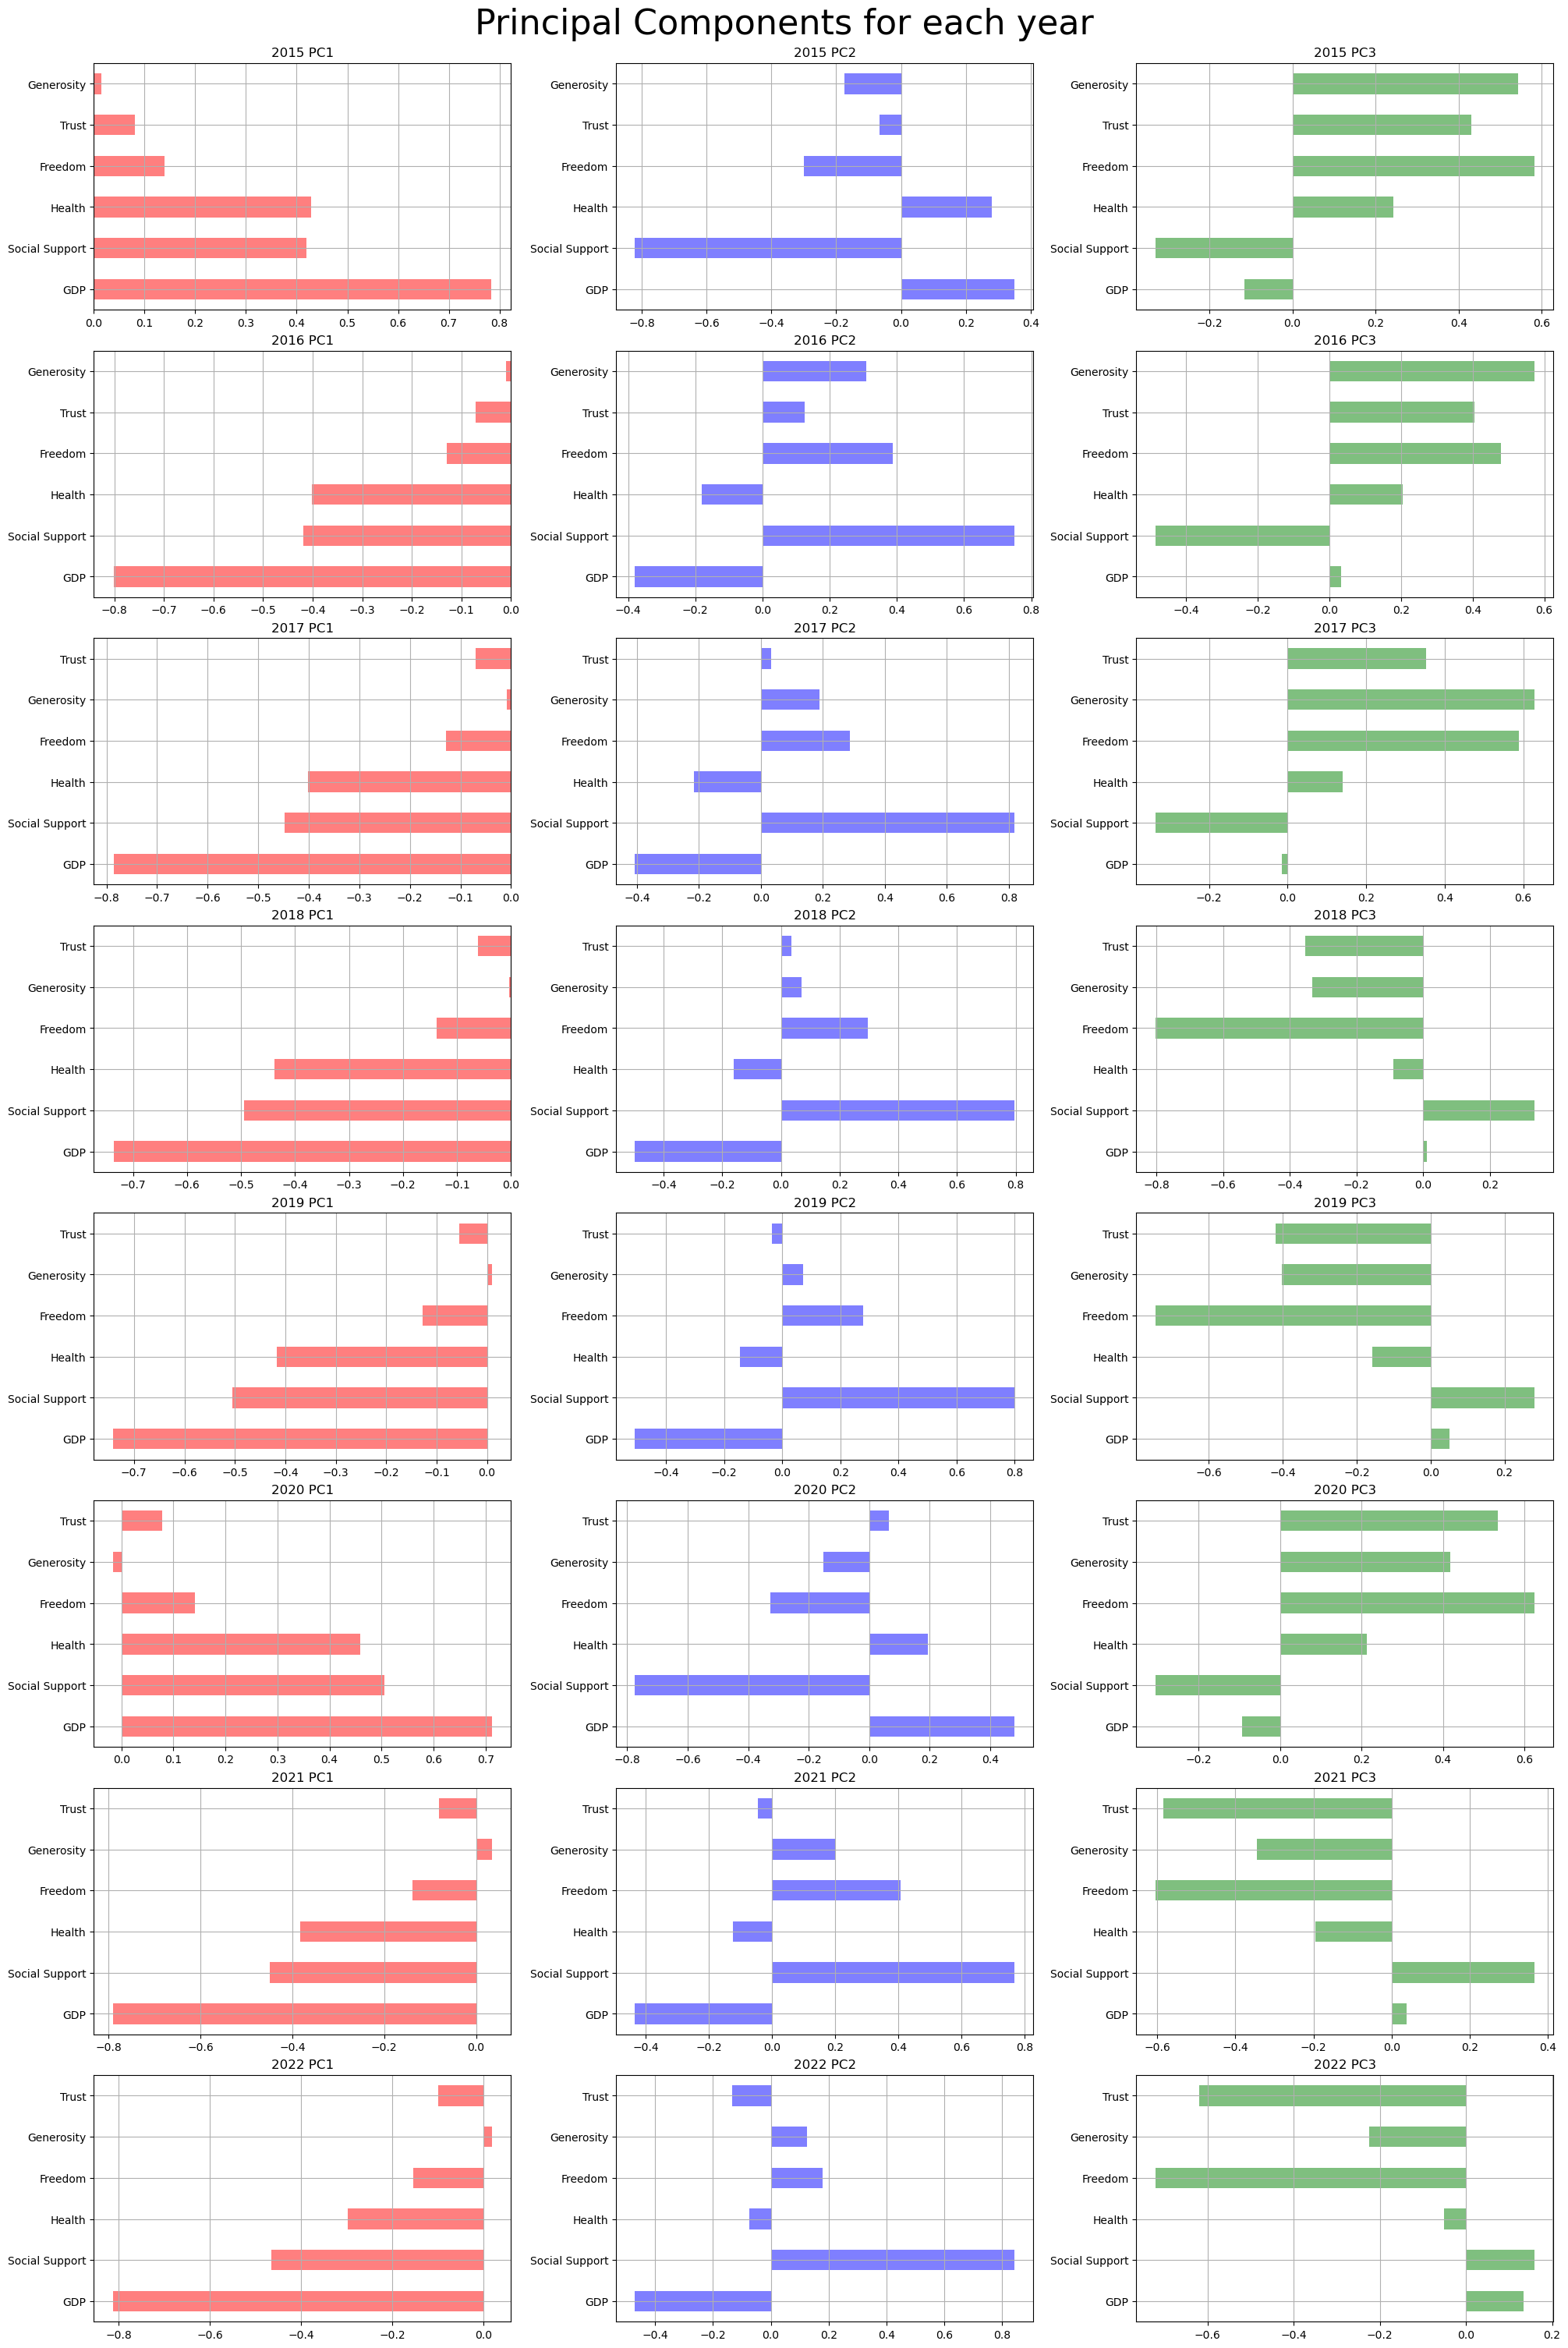

In [26]:
num_pcs = 3
num_cols = len(wh_dfs.keys())
current_row = 0
drop_cols = ['Country', 'Rank', 'Region', 'Score', 'Dystopia Residual']
colors = ['red', 'blue', 'green']

fig, axes = plt.subplots(num_cols, num_pcs, layout='constrained', figsize=(20, 30))

for key, value in wh_dfs.items():
    existing_cols = [col for col in drop_cols if col in value.columns]
    extracted_df = value.drop(columns=existing_cols)

    pcs = compute_pcs(extracted_df, n_components=num_pcs)

    for i in range(num_pcs):
        pc = pd.Series(pcs[:, i], index=extracted_df.columns)
        pc.plot(kind='barh', ax=axes[current_row, i], color=colors[i], alpha=.5, grid=True)
        axes[current_row, i].set_title(f'{key} PC{i+1}')

    current_row += 1

fig.suptitle('Principal Components for each year', fontsize=32)
plt.show()


The plots above show the principal components in terms of the data contained in each year. The number of columns may vary throughout analysis. From the left column to the right shows the important features in calculating the happiness scores.

In the first principal component, the feature that is most important is the GDP, or the country's wealth. Does this indicate that money is important above all else to a person's happiness? 

In [27]:
wealth =  wh_dfs['2022'].sort_values(by='GDP', ascending=False)
wealth = wealth[['Country', 'Rank', 'GDP', 'Social Support', 'Freedom']]
wealth = wealth.set_index('Country')
wealth.head(10)

,Rank,GDP,Social Support,Freedom
Country,,,,
Luxembourg*,6,2.209,1.155,0.700
Singapore,27,2.149,1.127,0.672
Ireland,13,2.129,1.166,0.627
Switzerland,4,2.026,1.226,0.677
United Arab Emirates,24,1.998,0.980,0.702
Norway,8,1.997,1.239,0.728
United States,16,1.982,1.182,0.574
Hong Kong S.A.R. of China,81,1.957,0.954,0.400
Denmark,2,1.953,1.243,0.719


If that were the case, then the richest countries should have a higher ranking. But according to the 2022 report, that is not the case. It seems that about half of the richer countries are near the top and the other half are scattered throughout the rest of the report. The amount of wealth could be indicative of the country's ability to properly provide the basic needs to a country such as housing, livable wage, food, healthcare, and education. Assuming it's budgeted towards those necessities. 

The second principal component shows that social support heavily impacted the happiness score. This could not only mean a supportive family, but also a supportive community, including friends, coworkers, and neighbors.

In [28]:
social = wealth[wealth['Social Support'] > 1]
social.head(10)

,Rank,GDP,Social Support,Freedom
Country,,,,
Luxembourg*,6,2.209,1.155,0.700
Singapore,27,2.149,1.127,0.672
Ireland,13,2.129,1.166,0.627
Switzerland,4,2.026,1.226,0.677
Norway,8,1.997,1.239,0.728
United States,16,1.982,1.182,0.574
Denmark,2,1.953,1.243,0.719
Netherlands,5,1.945,1.206,0.651
Iceland,3,1.936,1.320,0.718


Looking at countries with a social support highter than 1, the data is getting closer to showing the top 10 countries. But there are still a few lower rankings involved. The third principal component shown in the plot above shows that freedom is also a big factor in a country's happiness score.

In [29]:
freedom = social[social['Freedom'] > .65]
freedom.head(10)

,Rank,GDP,Social Support,Freedom
Country,,,,
Luxembourg*,6,2.209,1.155,0.700
Singapore,27,2.149,1.127,0.672
Switzerland,4,2.026,1.226,0.677
Norway,8,1.997,1.239,0.728
Denmark,2,1.953,1.243,0.719
Netherlands,5,1.945,1.206,0.651
Iceland,3,1.936,1.320,0.718
Sweden,7,1.920,1.204,0.724
Australia,12,1.900,1.203,0.676


Narrowing it down to the three most important features (GDP, Social Support, and Freedom), a table of _only_ the top 10 countries can be populated, sorted by their GDP. 

In terms of yearly trends, the principal components show the following:

1. GDP is consistently the most important feature in calculating the happiness score.
2. Social support is consistently the second most important feature in calculating the happiness score.
3. Freedom, generosity, and trust are in close competition for the third most important feature, with freedom having the strongest showing.
4. Health is the least important feature every year.

Looking at the original data and comparing it to the principal components that are found, it seems that the data is already in principal component form. This can be seen by looking at the magnitude of the original data. The GDP has the highest values, followed by social support, and then freedom. This correlates with the principal components that were found. Can it be assumed that the prinicpal components be the same if we separate the data by country?

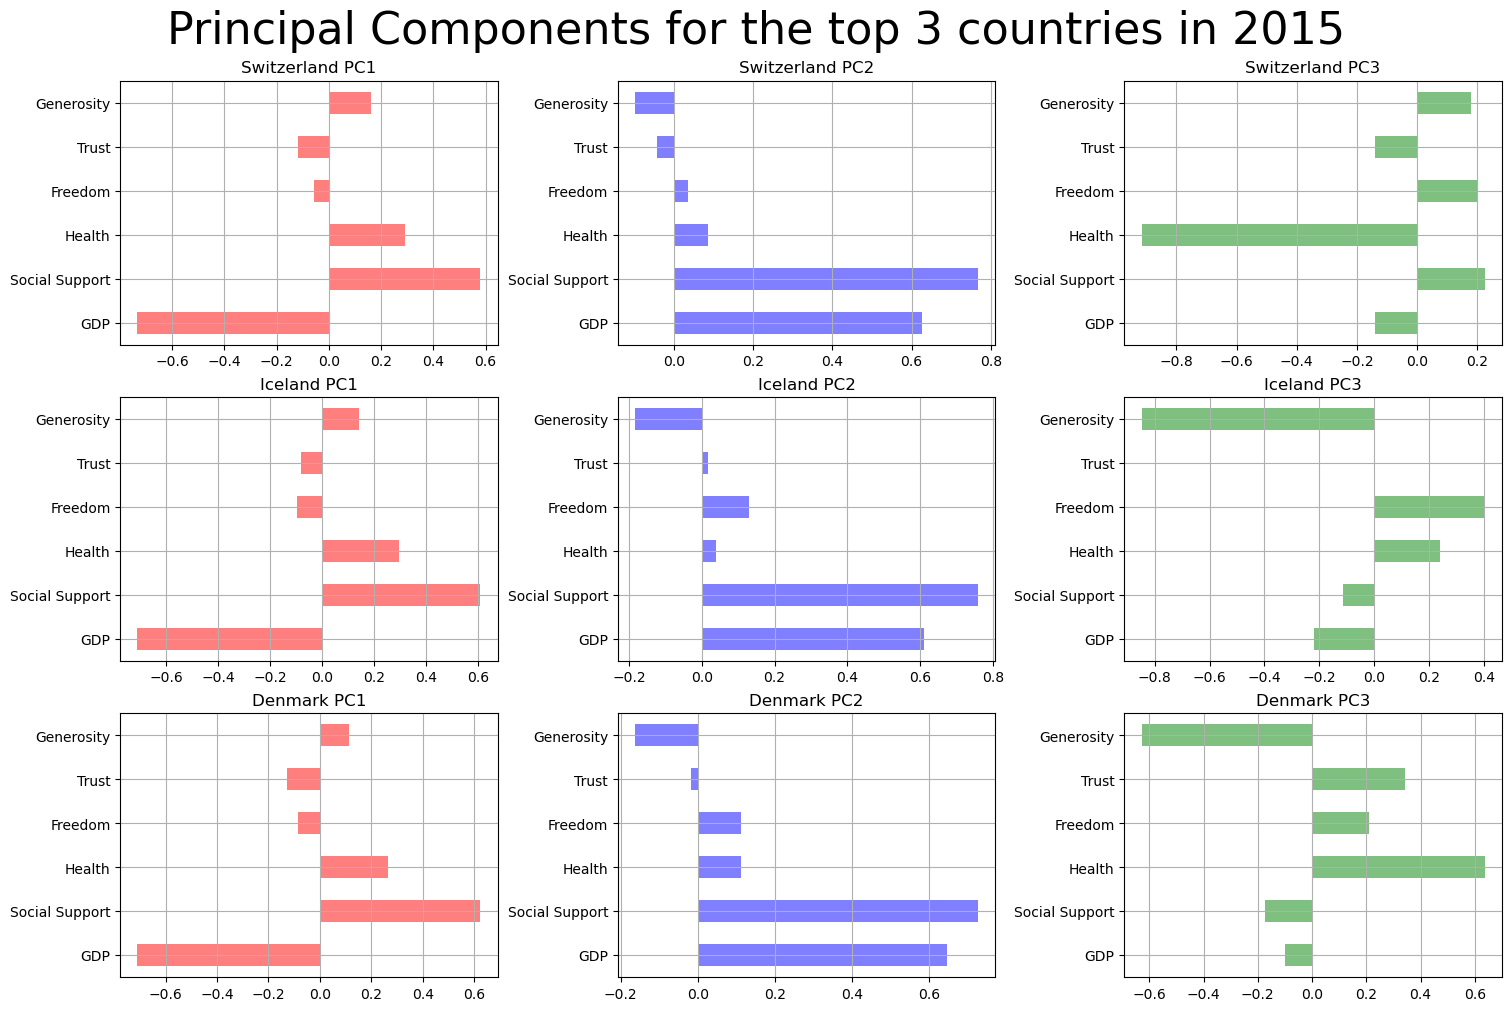

In [30]:
# Extracting data for the top 3 countries in 2015
drop_cols = ['Country', 'Rank', 'Region', 'Score', 'Dystopia Residual', 'Year']
current_row = 0

higher_countries = wh_dfs['2015'].sort_values(by='Rank', ascending=True)[:3]
higher_country_data = {}

for country in higher_countries['Country'].values:
    higher_country_data[country] = extract_country(country, wh_dfs, drop_columns=drop_cols)

num_pcs = 3
num_rows = len(higher_country_data.keys())
colors = ['red', 'blue', 'green']

fig, axes = plt.subplots(num_rows, num_pcs, layout='constrained', figsize=(15, 10))

for country in higher_country_data.keys():
    country_pc = compute_pcs(higher_country_data[country].drop(columns=['Year']), n_components=num_pcs)

    for i in range(num_pcs):
        pc = pd.Series(country_pc[:, i], index=higher_country_data[country].drop(columns=['Year']).columns)
        pc.plot(kind='barh', ax=axes[current_row, i], color=colors[i], alpha=.5, grid=True)
        axes[current_row, i].set_title(f'{country} PC{i+1}')

    current_row += 1

fig.suptitle('Principal Components for the top 3 countries in 2015', fontsize=32)
plt.show()

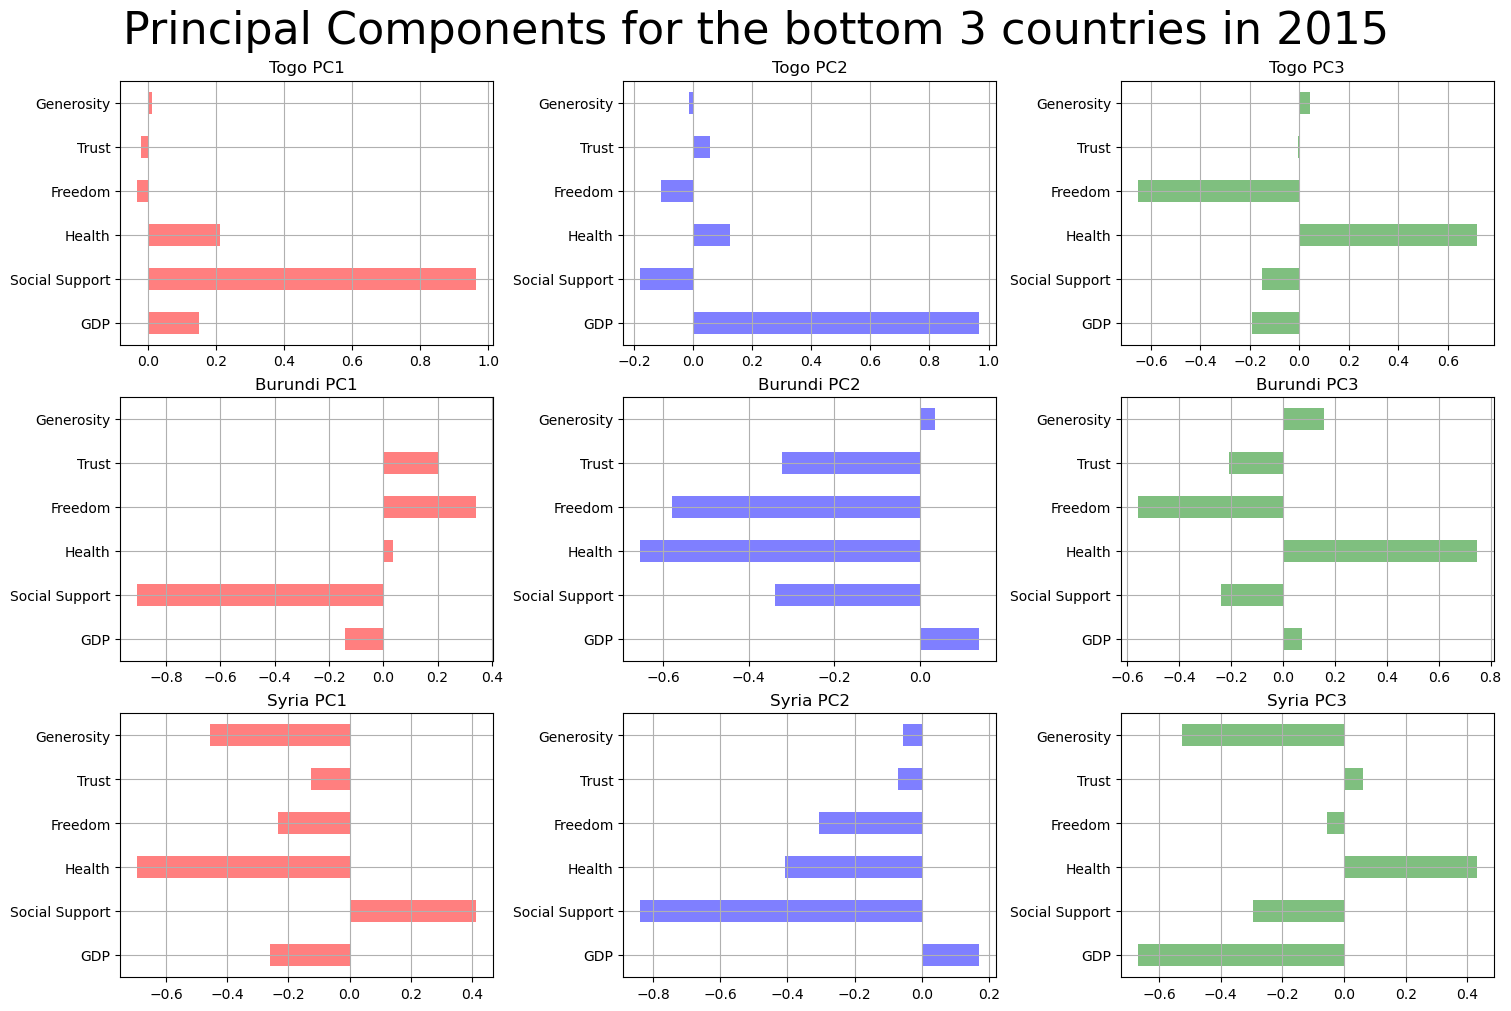

In [31]:
# Extracting data for the bottom 3 countries in 2015
drop_cols = ['Country', 'Rank', 'Region', 'Score', 'Dystopia Residual', 'Year']
current_row = 0

lower_countries = wh_dfs['2015'].sort_values(by='Rank', ascending=False)[:3]
lower_country_data = {}

for country in lower_countries['Country'].values:
    lower_country_data[country] = extract_country(country, wh_dfs, drop_columns=drop_cols)

num_pcs = 3
num_rows = len(lower_country_data.keys())
colors = ['red', 'blue', 'green']

fig, axes = plt.subplots(num_rows, num_pcs, layout='constrained', figsize=(15, 10))

for country in lower_country_data.keys():
    country_pc = compute_pcs(lower_country_data[country].drop(columns=['Year']), n_components=num_pcs)

    for i in range(num_pcs):
        pc = pd.Series(country_pc[:, i], index=lower_country_data[country].drop(columns=['Year']).columns)
        pc.plot(kind='barh', ax=axes[current_row, i], color=colors[i], alpha=.5, grid=True)
        axes[current_row, i].set_title(f'{country} PC{i+1}')

    current_row += 1

fig.suptitle('Principal Components for the bottom 3 countries in 2015', fontsize=32)
plt.show()

The assumption is shown to be false. By looking at the principal components for the top three ranked countries, GDP and social support are still the top two principal components, but health and generosity have replaced freedom for the third principal component. Looking at the bottom three ranked countries, the top three principal components are very different. The graphs suggest that different countries have different priorities when it comes to their happiness. This is something that is easily seen by looking at the real world and the different cultures that it contains. 

##### Correlation of WHR

It is an important step in data analysis to find how well the features are correlated with each other. Correlation refers to what kind of relationship two features have with each other, which means how much one feature's value depends on another feature's value. When it comes to the world's happiness, finding features that are highly correlated can help find a cause behind certain changes or predict future changes. Score will be omitted from the correlation matrix as the section on feature importance has already shown the correlation between the features and the score.

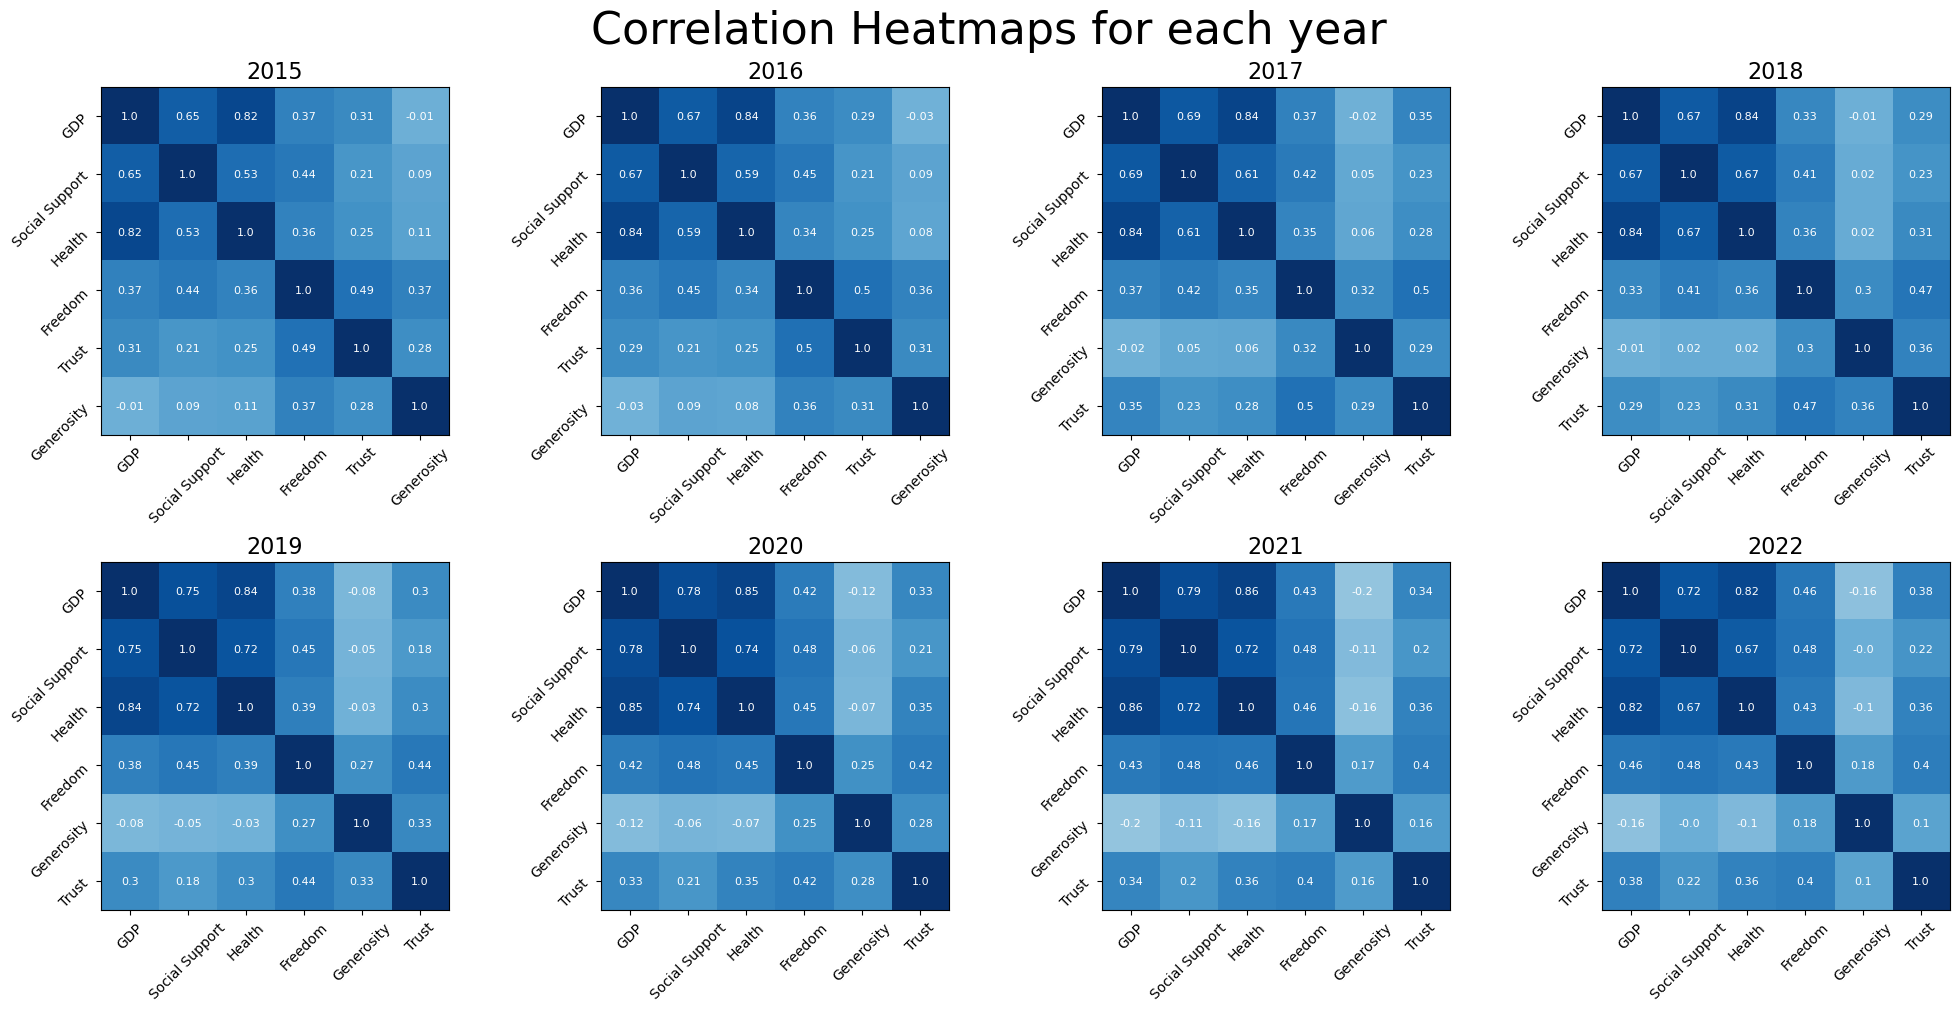

In [32]:
drop_cols = ['Country', 'Rank', 'Dystopia Residual', 'Score']
row = 0
col = 0
correlation_results = {}

fig, axes = plt.subplots(2, 4, layout='constrained', figsize=(20, 10))

for key, value in wh_dfs.items():
    correlation_results[key] = value.drop(columns=drop_cols).corr()

    axes[row, col].imshow(correlation_results[key], cmap='Blues', vmin=-1, vmax=1)

    axes[row, col].set_xticks(np.arange(len(correlation_results[key].columns)), labels=correlation_results[key].columns, rotation=45)
    axes[row, col].set_yticks(np.arange(len(correlation_results[key].columns)), labels=correlation_results[key].columns, rotation=45)
    axes[row, col].set_title(key, fontsize=16)
    axes[row, col].grid(False)

    np_values = correlation_results[key].to_numpy()
    for i in range(len(np_values)):
        for j in range(len(np_values[i])):
            axes[row, col].text(j, i, round(np_values[i, j], 2), ha='center', va='center', color='white', fontsize=8)

    col += 1
    if col == 4:
        col = 0
        row += 1

fig.suptitle('Correlation Heatmaps for each year', fontsize=32)
plt.show()


The correlation maps above are for each year. The three features with the highest correlation are GDP, social support, and health. It is likely that if anyone of these features increases, so will the others. The strength of these relationships mostly increase as the years go by. The most interesting relationship is between GDP and generosity. In every year, if either GDP or generosity increases, the other decreases. This is especially interesting when looking at a GDP increase to generosity decrease relationship. It suggests that as a country's wealth increases, the perception of generosity decreases. 

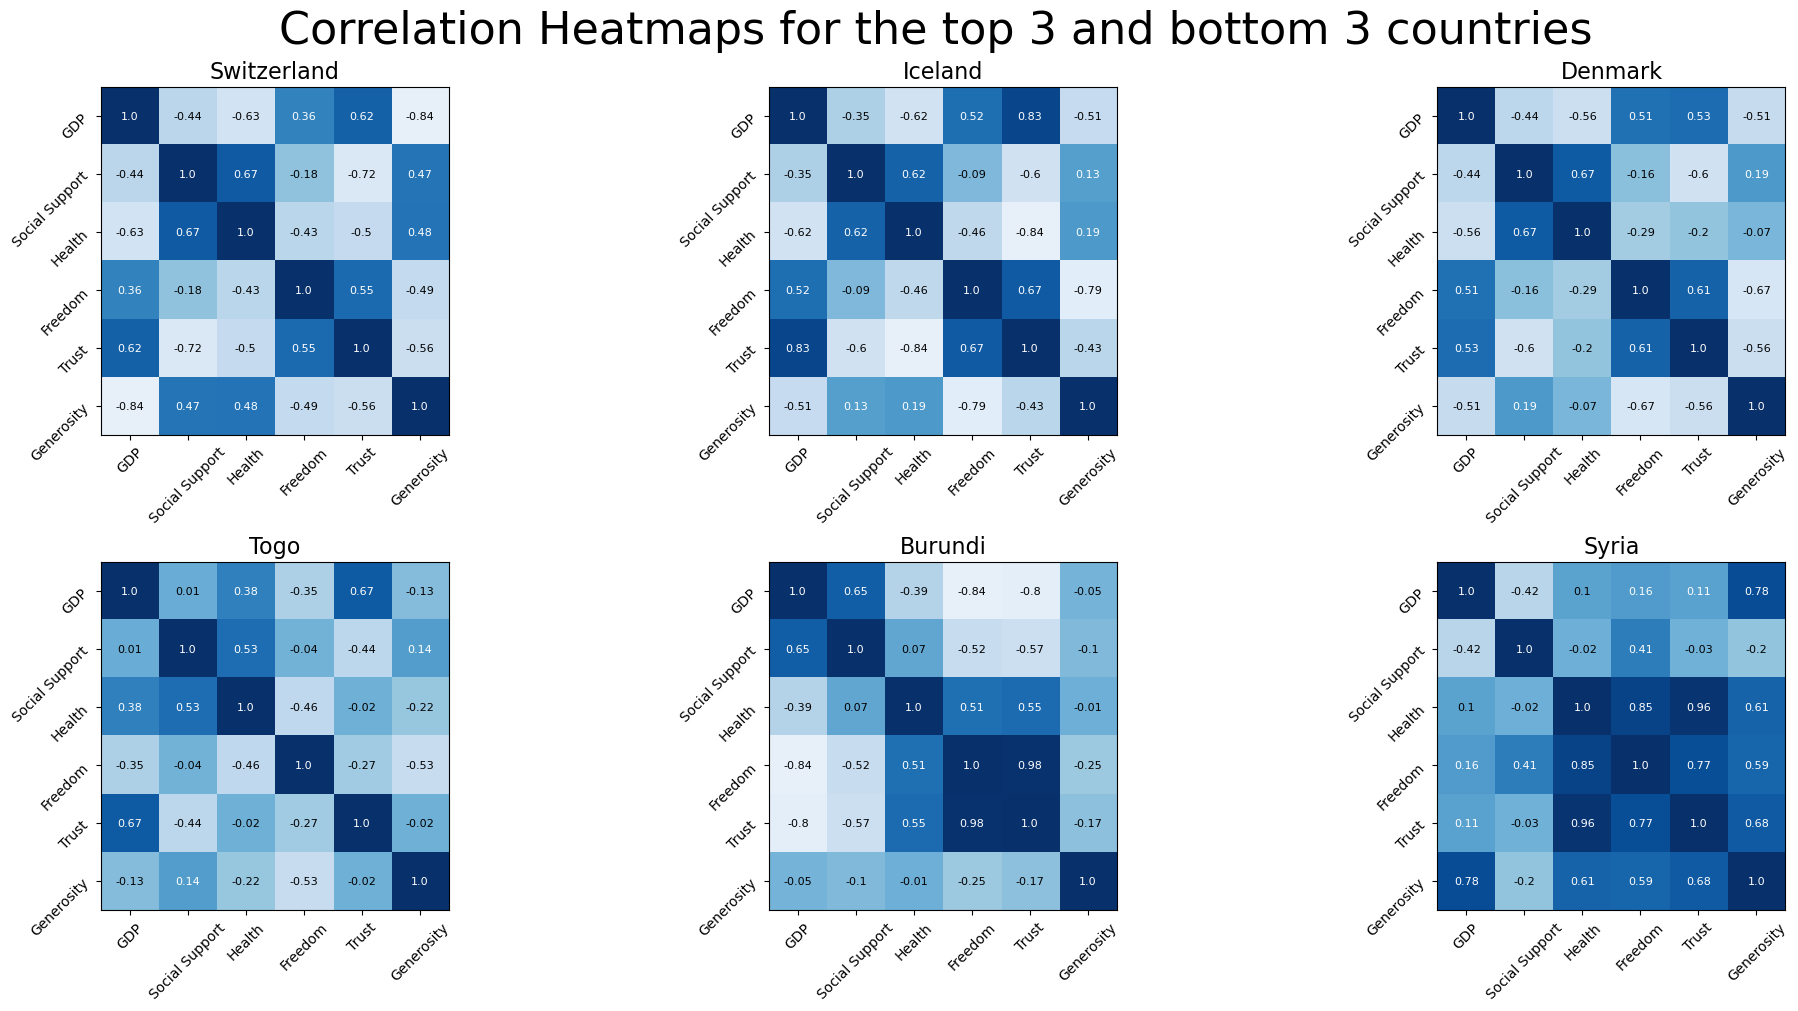

In [33]:
drop_cols = ['Rank', 'Dystopia Residual', 'Score']
col = 0

fig, axes = plt.subplots(2, 3, layout='constrained', figsize=(20, 10))

for country in higher_country_data.keys():
    correlation = higher_country_data[country].corr()
    axes[0, col].imshow(correlation, cmap='Blues', vmin=-1, vmax=1)

    axes[0, col].set_xticks(np.arange(len(correlation.columns)), labels=correlation.columns, rotation=45)
    axes[0, col].set_yticks(np.arange(len(correlation.columns)), labels=correlation.columns, rotation=45)
    axes[0, col].set_title(country, fontsize=16)
    axes[0, col].grid(False)


    for i in range(len(correlation)):
        for j in range(len(correlation)):
            axes[0, col].text(j, i, round(correlation.iloc[i, j], 2), ha='center', va='center', color=('white' if correlation.iloc[i, j] > .1 else 'black'), fontsize=8)

    col += 1

col = 0
for country in lower_country_data.keys():
    correlation = lower_country_data[country].corr()
    axes[1, col].imshow(correlation, cmap='Blues', vmin=-1, vmax=1)

    axes[1, col].set_xticks(np.arange(len(correlation.columns)), labels=correlation.columns, rotation=45)
    axes[1, col].set_yticks(np.arange(len(correlation.columns)), labels=correlation.columns, rotation=45)
    axes[1, col].set_title(country, fontsize=16)
    axes[1, col].grid(False)


    for i in range(len(correlation)):
        for j in range(len(correlation)):
            axes[1, col].text(j, i, round(correlation.iloc[i, j], 2), ha='center', va='center', color=('white' if correlation.iloc[i, j] > .1 else 'black'), fontsize=8)

    col += 1

fig.suptitle('Correlation Heatmaps for the top 3 and bottom 3 countries ', fontsize=32)
plt.show()

Like feature importance, correlations change depending on the country. The top three countries have a lot of low and negative relationships. The bottom three countries have a lot of medium-high and positive relationships. The trend of the negative GDP-to-Generosity relationship persists in all of the shown countries, except for Syria. Syria has a strong, positive relationship between GDP and generosity. This could be from the country's ongoing civil war.

One of the most common positive relationships among the top three countries is between social support and health. Doing a brief search into the icelandic, danish, and swiss healthcare systems, they all have universal healthcare with some differing levels of coverage or rules.

---

Random VIS stuff, will organize later!

In [96]:
import plotly.graph_objs as go
from plotly.offline import iplot

current_year_df = wh_dfs['2022']
data = dict(type = 'choropleth', 
           locations = current_year_df['Country'],
           locationmode = 'country names',
           colorscale='deep',
           z = current_year_df['Score'], 
           text = current_year_df['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score in 2022', 
              geo = dict(showframe = True, projection = {'type': 'natural earth'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [97]:
top3 = wh_dfs['2022'].sort_values(by='Rank', ascending=True)[:3]
top3

,Rank,Country,Score,GDP,Social Support,Health,Freedom,Generosity,Trust,Dystopia Residual
0,1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,2.517
1,2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,2.224
2,3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,2.319


In [63]:
import ipywidgets as ip

def plot_happiness(year):
    current_year_df = wh_dfs[str(year)]
    data = dict(type = 'choropleth', 
           locations = current_year_df['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = current_year_df['Score'], 
           text = current_year_df['Country'],
           colorbar = {'title':'Happiness Score'})

    layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'natural earth'}))

    choromap3 = go.Figure(data = [data], layout=layout)
    iplot(choromap3)

ip.interact(plot_happiness, year=ip.IntSlider(min=2015, max=2022, step=1, value=2015))

interactive(children=(IntSlider(value=2015, description='year', max=2022, min=2015), Output()), _dom_classes=(…

<function __main__.plot_happiness(year)>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


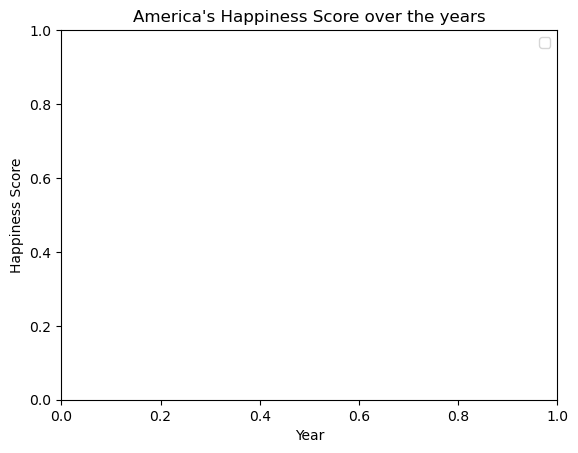

In [92]:
# Line Plot of America's Happiness Score

plt.title('America\'s Happiness Score over the years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()

plt.show()


In [ ]:
# Every country who has ranked first

In [98]:
# Max highlight

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

wh_dfs['2022'].style.apply(highlight_max)

,Rank,Country,Score,GDP,Social Support,Health,Freedom,Generosity,Trust,Dystopia Residual
0,1,Finland,7.821000,1.892000,1.258000,0.775000,0.736000,0.109000,0.534000,2.517000
1,2,Denmark,7.636000,1.953000,1.243000,0.777000,0.719000,0.188000,0.532000,2.224000
2,3,Iceland,7.557000,1.936000,1.320000,0.803000,0.718000,0.270000,0.191000,2.319000
3,4,Switzerland,7.512000,2.026000,1.226000,0.822000,0.677000,0.147000,0.461000,2.153000
4,5,Netherlands,7.415000,1.945000,1.206000,0.787000,0.651000,0.271000,0.419000,2.136000
5,6,Luxembourg*,7.404000,2.209000,1.155000,0.790000,0.700000,0.120000,0.388000,2.042000
6,7,Sweden,7.384000,1.920000,1.204000,0.803000,0.724000,0.218000,0.512000,2.003000
7,8,Norway,7.365000,1.997000,1.239000,0.786000,0.728000,0.217000,0.474000,1.924000
8,9,Israel,7.364000,1.826000,1.221000,0.818000,0.568000,0.155000,0.143000,2.633000
9,10,New Zealand,7.200000,1.852000,1.235000,0.752000,0.680000,0.245000,0.483000,1.953000
